# BE 1 :

## Les imports

In [58]:
import math as mp
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from tqdm import tqdm

## Problème 0

La fonction utilisée est : sur [-1;1]

In [19]:
def f(x):
    return -x*x*(2+np.sin(10*x))**2

In [20]:
def tracer():
    X = np.linspace(-1,1,100)
    plt.figure()
    plt.plot(X,f(X))
    plt.title('f(X)')

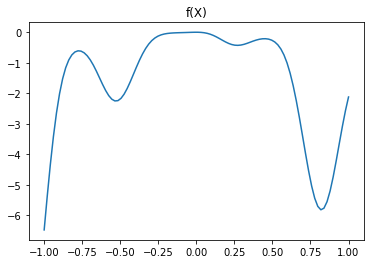

In [21]:
tracer()

In [68]:
def mesure_temps(algo,param):
    debut = time.time()
    rendu = algo(*param)
    fin = time.time()
    duree = fin - debut
    #print("Le temps d'exécution de l'algorithme est de :", duree, "secondes")
    #print("Le résultat est :", rendu)
    
    return duree, rendu

### Test d'un premier algo génétique

In [74]:
def algo_genetique(Npop,pM,pm,ps,prec,em):
    
    #On génère un tableau numpy de départ de facon aléatoire
    pop = np.random.uniform(-1, 1, (Npop))
    #On calcul f(depart)
    calcul = f(pop)
    
    #On trie le résultat (ainsi que la pop initiale)
    indices = np.argsort(calcul)
    pop = pop[indices]
    calcul = calcul[indices]
    
    #On calcul l'erreur :
    erreur = abs(calcul[Npop-1]) #on sait que le maximum est en 0 (calcul théorique)

    # !!! ON NE REMPLACE QUE LA FIN DE LA LISTE !!!
    #Boucle de répétition :
    while erreur > prec :
        
        #Grande mutation :
        if pM > 0: 
            #on calcul le nombre d'élément à modifier
            taille_sous_tableau_M = int(pM*Npop)
            #on calcul les valeurs alétoire
            pop_M = np.random.uniform(-1, 1, (taille_sous_tableau_M))
            #on fait l'attribution
            pop[0:taille_sous_tableau_M] = pop_M
    
        #Petite mutation : 
        if pm > 0 :
            #on réattribue une valeur aléatoire dans une boule de rayon em
            taille_sous_tableau_m = int(pm*Npop)
            pop_m = pop[Npop-1] + np.random.uniform(-em, em, (taille_sous_tableau_m))
            pop[taille_sous_tableau_M:taille_sous_tableau_M+taille_sous_tableau_m+1] = pop_m    

        #Crossover :
        if ps>0:
            taille_sous_tableau_s = int(ps*Npop)
            pop_s = (pop[Npop-1] + pop[taille_sous_tableau_M+taille_sous_tableau_m+1:taille_sous_tableau_M+taille_sous_tableau_m+taille_sous_tableau_s+1])/2
            pop[taille_sous_tableau_M+taille_sous_tableau_m+1:taille_sous_tableau_M+taille_sous_tableau_m+taille_sous_tableau_s+1] = pop_s

        #On calcul f(depart)
        calcul = f(pop)
    
        #On trie le résultat (ainsi que la pop initiale)
        indices = np.argsort(calcul)
        pop = pop[indices]
        calcul = calcul[indices]

        #On calcul l'erreur :
        erreur = abs(calcul[Npop-1]) #on sait que le maximum est en 0 (calcul théorique)
            
    return calcul[Npop-1]  

In [65]:
param = [10,0.8,0.1,0.1,1e-10,0.5]
duree , rendu = mesure_temps(algo_genetique,param)

Le temps d'exécution de l'algorithme est de : 0.1734023094177246 secondes
Le résultat est : -8.692122142051062e-07


In [87]:
def tracer_courbe(Nb_pts):
    eps = 1e-100
    l_tps = []
    l_rendu = []
    for i in range(1,Nb_pts+1):
        param = [10,0.8,0,0,10**(-8*(i/10)),0]
        duree , rendu = mesure_temps(algo_genetique,param)
        l_rendu.append(rendu)
        print("duree:" , duree, " rendu:" ,rendu)
        l_tps.append(np.log(duree+eps))
    plt.figure()
    plt.plot(duree,rendu)
    plt.title("Rendu en fonction du log(temps)")
    return l_tps , l_rendu

duree: 0.0  rendu: -0.008854019351320989
duree: 0.0  rendu: -0.0032423969894956072
duree: 0.0  rendu: -0.0031005473997113508
duree: 0.0  rendu: -1.4848075798472212e-06
duree: 0.007031679153442383  rendu: -8.008396716197944e-05
duree: 0.0  rendu: -1.4266981278575107e-06
duree: 0.0  rendu: -2.958355430143888e-08
duree: 0.008792638778686523  rendu: -8.993352006044247e-08
duree: 0.007906913757324219  rendu: -1.0338605851828317e-09
duree: 0.138580322265625  rendu: -4.944904086526277e-10
duree: 0.04201078414916992  rendu: -2.529114907923131e-10
duree: 0.09133672714233398  rendu: -1.2946787549298536e-10
duree: 0.016918420791625977  rendu: -1.4018062784572513e-11
duree: 0.0822751522064209  rendu: -4.241851481814778e-12
duree: 6.416809320449829  rendu: -8.411744379227193e-13


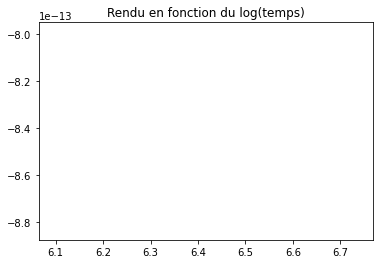

In [88]:
l_tps , l_rendu = tracer_courbe(15)

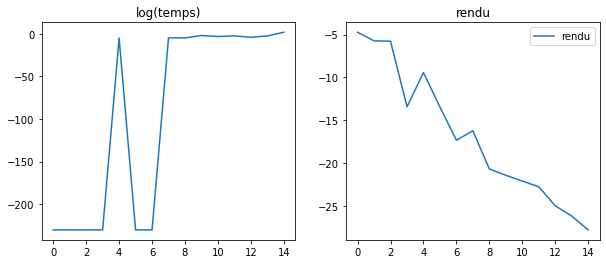

In [100]:
# Créez un graphe avec deux sous-graphes
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Tracer la première courbe sur le premier sous-graphe
axs[0].plot(l_tps, label="log(temps)")
axs[0].set_title("log(temps)")

# Tracer la deuxième courbe sur le deuxième sous-graphe
l_rendu_bis = np.log(np.abs(l_rendu))
axs[1].plot(l_rendu_bis, label="rendu")
axs[1].set_title("rendu")

# Ajouter une légende
plt.legend()

# Afficher le graphe
plt.show()

### Problème 1

In [24]:
def calcul_esperance(p1,p2,t):
    if t==1 :
        return p1*p2 + (1-p1)*(1-p2)
    else : 
        return p1*(1-p2)+ (1-p1)*p2

In [26]:
#calcul  de l'esperance type joueur 1 de i jouant avec pi de dire pair
def calcul_esperance_debut(pop,pi,t=1):
    esperance = 0
    for i in range(pop.shape[0]):
        esperance += calcul_esperance(pi,pop[i],t)
    return esperance

In [74]:
#mise à jour des populations 
def maj_pop(pop,i_meilleur,i_pire,taille_mutation=0.003):
    pop[i_pire] = pop[i_meilleur] + np.random.uniform(max(0,pop[i_meilleur]-taille_mutation)-pop[i_meilleur], -pop[i_meilleur] + min(pop[i_meilleur] +taille_mutation,1))

In [50]:
# on suppose que les proba sont associé au fait de dire paire !

def pair_impair(N1,N2,t_max):
    
    # --------------- Etape alpha -------------------
    #creation des populations
    pop1 = np.random.rand(N1)
    pop2 = np.random.rand(N2)
    
    # --------------- Etape beta --------------------
    #recherche du meilleur indice 
    i1 , esp1_max = 0 , 0
    i2 , esp2_max = 0 , 0
    
    #on calcul la meilleur espérance en moyenne
    for i in range (N1):
        esperance = calcul_esperance_debut(pop2,pop1[i],t=1)
        if esperance > esp1_max :
            esp1_max = esperance
            i1 = i
    
    for i in range (N2):
        esperance = calcul_esperance_debut(pop1,pop2[i],t=2)
        if esperance > esp2_max :
            esp2_max = esperance
            i2 = i
    
    # --------------- Etape gamma --------------------
    for k in range(t_max):
        
        #recherche meilleur et pire :
        i_meilleur1 , esp_meilleur1 = 0 , 0
        i_pire1  , esp_pire1 = 0 , 0
        i_meilleur2 , esp_meilleur2 = 0 , 0
        i_pire2 , esp_pire2 = 0 , 0
        
        #pop 1
        for i in range(N1):
            esp = calcul_esperance(pop1[i],pop2[i2],1)
            if esp > esp_meilleur1 :
                esp_meilleur1 = esp
                i_meilleur1 = i
            if esp < esp_pire1 :
                esp_pire1 = esp
                i_pire1 = i
        #pop 2      
        for i in range(N2):
            esp = calcul_esperance(pop2[i],pop1[i1],2)
            if esp > esp_meilleur2 :
                esp_meilleur2 = esp
                i_meilleur2 = i
            if esp < esp_pire2 :
                esp_pire2 = esp
                i_pire2 = i
                
        #mise à jour des populations :
        maj_pop(pop1,i_meilleur1,i_pire1)
        maj_pop(pop2,i_meilleur2,i_pire2)
        
        #maj des indices d'origines
        i1 , esp1_max =  i_meilleur1 , esp_meilleur1
        i2 , esp2_max =  i_meilleur2 , esp_meilleur2
    # ----------------- Resultat ---------------------
    # On suppose que notre algo converge en moyenne vers la bonne solution
    return pop1.mean(), pop2.mean()

100%|██████████| 20/20 [00:52<00:00,  2.63s/it]


Text(0.5, 1.0, 'N=500')

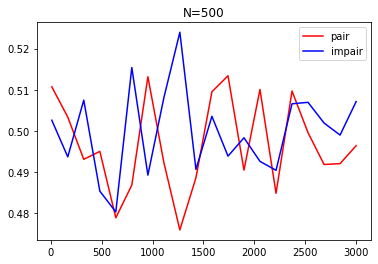

In [75]:
N = [10,20,50,100,200,500]
temps = np.linspace(10,3000,20,dtype=int)
res1,res2 = [],[]
i = N[5]
for j in tqdm(temps):
    (r1,r2) = pair_impair(i,i,j)
    res1.append(r1)
    res2.append(r2)
plt.figure()
plt.plot(temps,res1,c='r',label="pair")
plt.plot(temps,res2,c='b',label="impair")
plt.legend()
plt.title('N=' + str(i))

### Problème n°2

**Méthode**:
- diviser les valeurs de tirages possibles en h paquets
- pour chaque paquet les confronters à tout les autres paquets possibles de l'adversaire et voir qui est-ce qui donne le meilleur résultat en prenant les 4 configurations possibles